In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas_profiling

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", 200)

In [10]:
DATA_DIR = '../input/'

In [11]:
df = pd.read_csv(DATA_DIR+'team.csv')
print(df.shape)
df.head()

(200, 4)


,year,div,team_name,team_id
0,2019,J1,鹿島,1
1,2019,J1,広島,10
2,2019,J1,湘南,12
3,2019,J1,磐田,13
4,2019,J1,札幌,14


In [12]:
# 型確認
display(df.dtypes)

year          int64
div          object
team_name    object
team_id       int64
dtype: object

In [13]:
# 数値カラム
display('数値カラム：', list(df.select_dtypes(include='number').columns))

'数値カラム：'

['year', 'team_id']

In [14]:
# 重複行の確認，もし0でないなら処理
print('重複行数: ', df.duplicated().sum())
df = df.loc[~df.duplicated(),:]

重複行数:  0


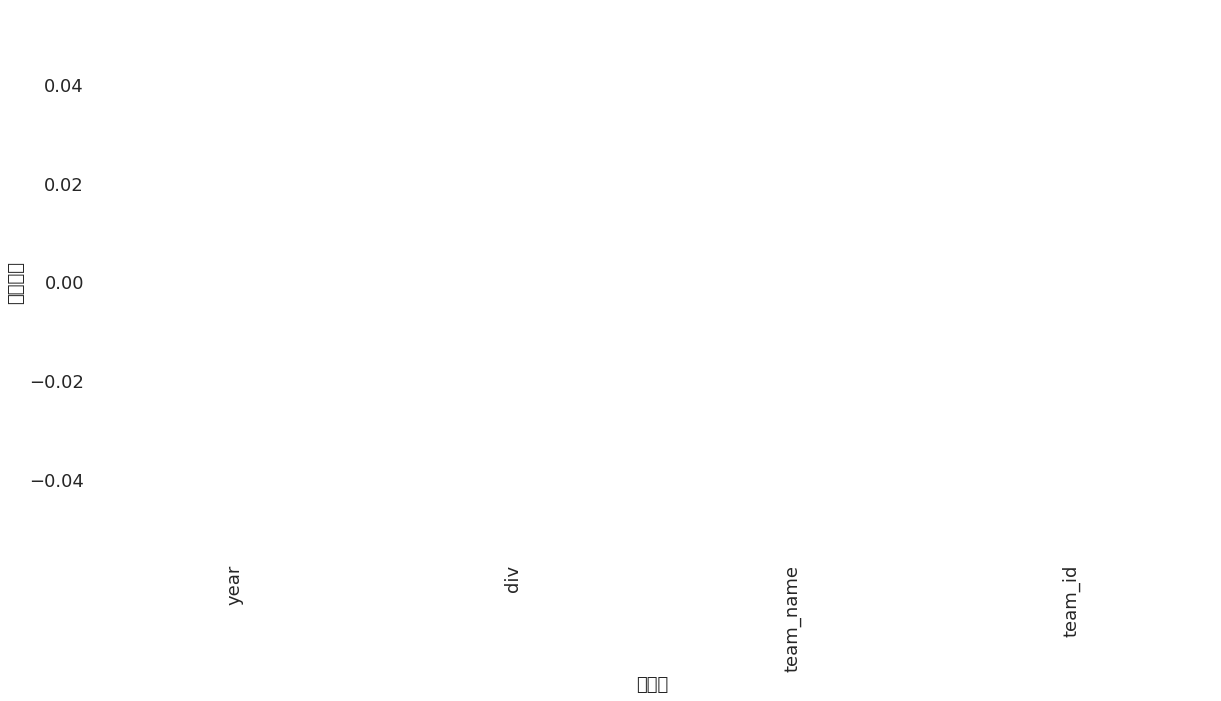

In [15]:
# 欠損値の確認
missing_dict = df.isnull().sum()
missing_rate = missing_dict.values / df.shape[0]
df_missing = pd.DataFrame({'カラム': missing_dict.index, '欠損数': missing_dict.values, '欠損割合': missing_rate}).sort_values(by='欠損割合', ascending=False)
df_missing = df_missing.set_index('カラム')

# 欠損割合可視化
plt.figure(figsize=(20, 10))
sns.barplot(df_missing.index, df_missing['欠損割合'])
plt.xlabel("カラム", fontsize=18)
plt.ylabel("欠損割合", fontsize=18)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)
plt.show()

In [16]:
# 1つ以上欠損あるものだけ表示
display(df_missing[df_missing['欠損数']>0])

,欠損数,欠損割合
カラム,,


In [17]:
# カラムごとのuniqueな数
display('ユニーク数: ', df.nunique().sort_values(ascending=False))

'ユニーク数: '

team_id      44
team_name    44
year          5
div           2
dtype: int64

------------------------------------------------------------
year
# of unique:  5
statistics:  count     200.000000
mean     2017.000000
std         1.417762
min      2015.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64


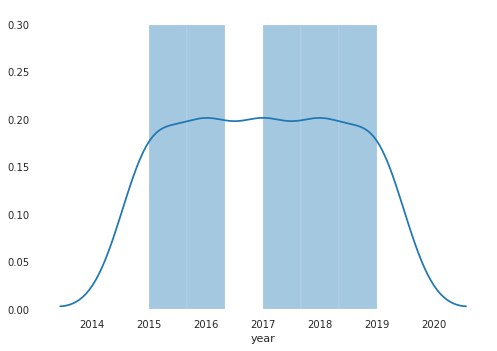

------------------------------------------------------------


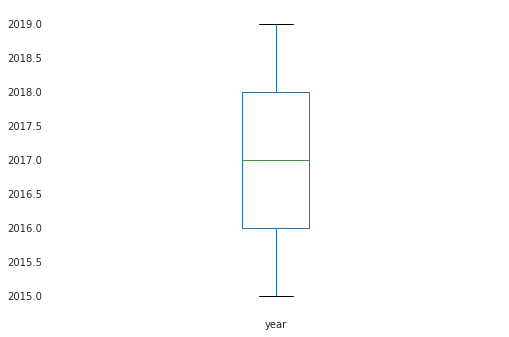

------------------------------------------------------------
div
# of unique:  2
statistics:  count     200
unique      2
top        J2
freq      110
Name: div, dtype: object
value_counts: 


J2    0.55
J1    0.45
Name: div, dtype: float64

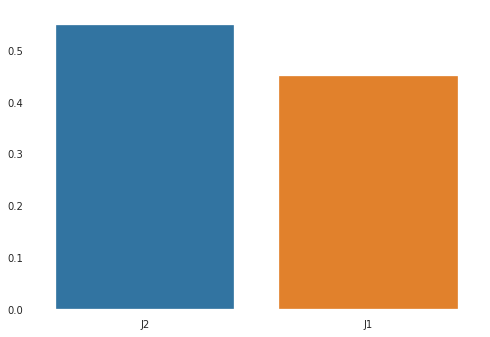

------------------------------------------------------------
team_name
# of unique:  44
statistics:  count     200
unique     44
top        徳島
freq        5
Name: team_name, dtype: object
value_counts: 


水戸      0.025
柏       0.025
札幌      0.025
広島      0.025
山形      0.025
甲府      0.025
新潟      0.025
鹿島      0.025
G大阪     0.025
湘南      0.025
千葉      0.025
磐田      0.025
松本      0.025
京都      0.025
横浜FM    0.025
川崎F     0.025
岡山      0.025
名古屋     0.025
鳥栖      0.025
東京V     0.025
長崎      0.025
徳島      0.025
仙台      0.025
岐阜      0.025
福岡      0.025
大宮      0.025
愛媛      0.025
横浜FC    0.025
清水      0.025
FC東京    0.025
金沢      0.025
浦和      0.025
神戸      0.025
C大阪     0.025
熊本      0.020
山口      0.020
町田      0.020
讃岐      0.020
大分      0.020
栃木      0.015
群馬      0.015
北九州     0.010
鹿児島     0.005
琉球      0.005
Name: team_name, dtype: float64

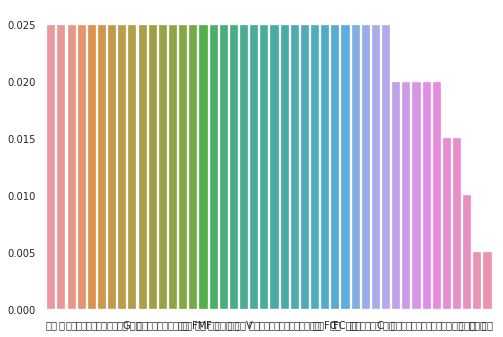

------------------------------------------------------------
team_id
# of unique:  44
statistics:  count    200.000000
mean      42.620000
std       65.843164
min        1.000000
25%       11.750000
50%       27.500000
75%       42.000000
max      338.000000
Name: team_id, dtype: float64


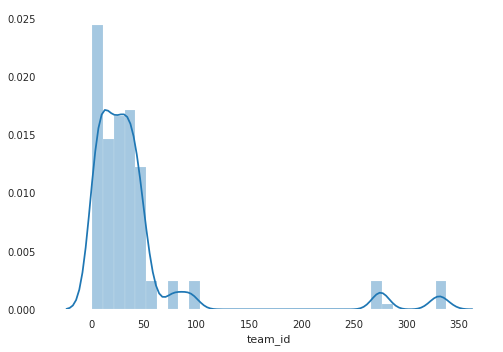

------------------------------------------------------------


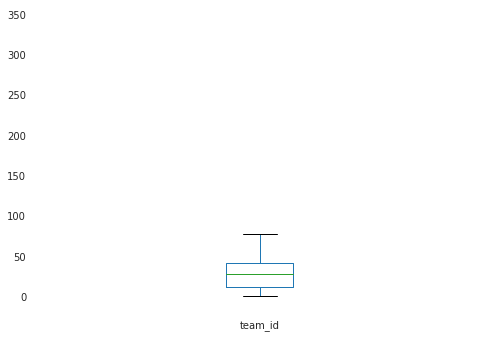

In [18]:
# 中身の確認
for col in df.columns:
    print('-'*60)
    print(col)
    print('# of unique: ', df[col].nunique())
    print('statistics: ', df[col].describe())
    if df[col].dtype=='object':
        print('value_counts: ')
        val_cnt = df[col].value_counts(dropna=False, normalize=True).sort_values(ascending=False)
        display(val_cnt)
        sns.barplot(x=val_cnt.index, y=val_cnt.values)
        plt.show()
        
    else:
        sns.distplot(df[col].dropna())
        plt.show()
        
        # 箱ひげ図
        print('-'*60)
        df[col].plot.box()
        plt.show()

#         # log10
#         df_rm0 =df[df[col]!=0][col]
#         sns.distplot(np.log10(df_rm0).dropna())
#         plt.show()